<a href="https://colab.research.google.com/github/carascott/1stproject/blob/main/CarasAnalysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

In [4]:
df = pd.read_csv('/content/MichelleCara.csv', low_memory=False)
print(df)

        age     sex        marital    coninc                    degree  \
0      48.0    male        married  105852.0               high school   
1      25.0    male  never married   72774.0                bachelor's   
2      42.0    male       divorced   59542.0                bachelor's   
3      24.0    male  never married   33079.0               high school   
4      24.0  female        married   72774.0                bachelor's   
...     ...     ...            ...       ...                       ...   
23534  22.0  female  never married   18480.0               high school   
23535  29.0  female        married   45360.0                  graduate   
23536  32.0    male  never married   94080.0  associate/junior college   
23537  49.0  female        married  107520.0                  graduate   
23538  50.0    male        married   67200.0                  graduate   

              happy      health  
0        unanswered        poor  
1      pretty happy  unanswered  
2      pr

In [44]:
# Ignoring unanswered/NAs on graphs because it is not relevant for analysis
df = df[df['health'] != 'unanswered']
df = df[df['happy'] != 'unanswered']
df = df[df['marital'] != 'unanswered']
# Cleaning marital column for graph specifics
df['marital'] = df['marital'].apply(lambda x: 'not married' if x != 'married' else x)
# Continuing ignoring unanswered
df = df[df['degree'] != 'unanswered']
df = df[df['sex'] != 'unanswered']

<Axes: xlabel='age', ylabel='Density'>

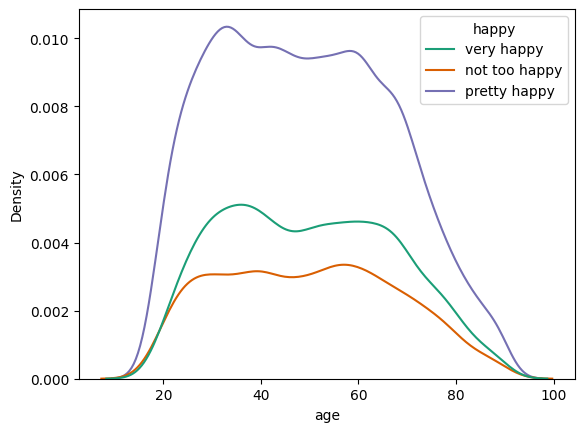

In [6]:
# Graph of age v happiness
sns.kdeplot(data=df,x='age',hue='happy', palette='Dark2')

In [19]:
df.loc[:,['happy','age']].groupby('happy').describe()
# Very happy mean age is about 50

age                                                    
                 count       mean        std   min   25%   50%   75%   max
happy                                                                     
not too happy   3865.0  49.441656  17.816969  18.0  34.0  49.0  63.0  89.0
pretty happy   12638.0  48.704463  17.665168  18.0  34.0  48.0  62.0  89.0
unanswered      1020.0  48.050000  16.751209  18.0  35.0  47.0  60.0  89.0
very happy      6016.0  49.868517  17.566778  18.0  35.0  49.0  64.0  89.0

<Axes: xlabel='age', ylabel='Density'>

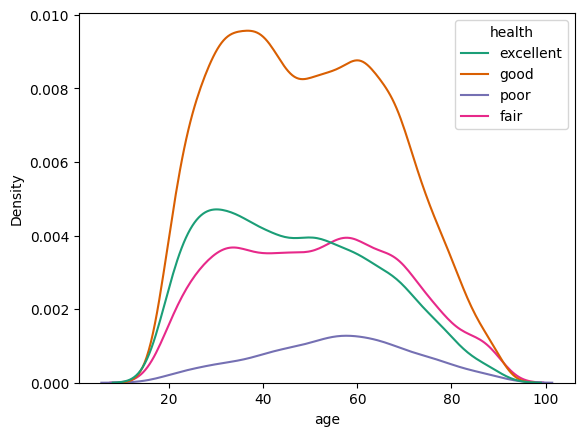

In [7]:
# Graph of age v health
sns.kdeplot(data=df,x='age',hue='health', palette='Dark2')

In [51]:
df.loc[:,['health','age']].groupby('health').describe()
# Poorest health mean person is around 55 years old

age                                                    
            count       mean        std   min   25%   50%   75%   max
health                                                               
excellent  3949.0  46.659661  17.469111  18.0  32.0  45.0  60.0  89.0
good       8604.0  49.308113  17.451956  18.0  35.0  49.0  63.0  89.0
fair       3703.0  51.142047  18.088408  18.0  36.0  51.0  65.0  89.0
poor        932.0  55.152361  16.260380  18.0  44.0  56.0  66.0  89.0

Age and health probably coincide to explains one's lifetime happiness level fluctuations due to the similarity of the two graphs.

<Axes: xlabel='coninc', ylabel='Density'>

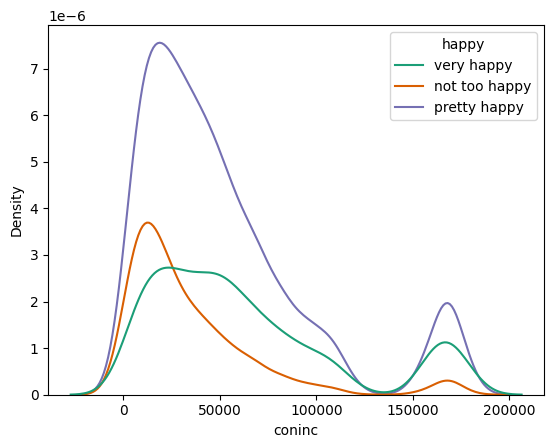

In [63]:
# Kernel plot of income v happiness
sns.kdeplot(data=df,x='coninc',hue='happy', palette='Dark2')

Not too happy decreases with income, but so do all of them untul aroumf $150,000. After this amount of income, happiness/not happy levels begin to increase again.

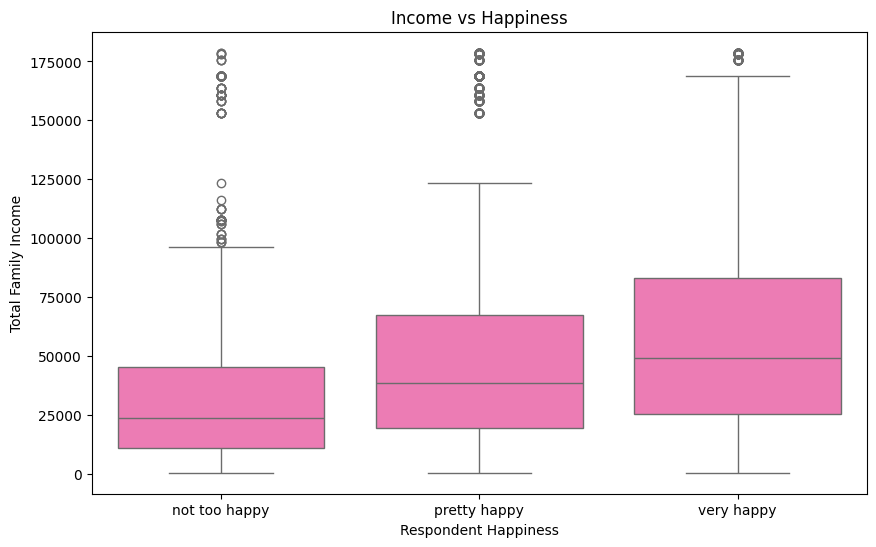

In [12]:
# Boxplot of income v happiness
happiness_order = ['not too happy', 'pretty happy', 'very happy']
plt.figure(figsize=(10, 6))
sns.boxplot(x='happy', y='coninc', data=df, order=happiness_order,
            color="hotpink")
plt.xlabel('Respondent Happiness')
plt.ylabel('Total Family Income')
plt.title('Income vs Happiness')
plt.show()

In [52]:
df.loc[:,['happy','coninc']].groupby('happy').describe()
# Mean not too happy $35,000 and mean very gappy is $62,000. MONEY = HAPPINESS

coninc                                                       \
                count          mean           std    min      25%      50%   
happy                                                                        
not too happy  2804.0  34572.906915  35197.770383  336.0  10920.0  23595.0   
pretty happy   8593.0  51531.176877  44142.944682  336.0  19277.5  38555.0   
very happy     4074.0  62245.232408  48640.708493  336.0  25200.0  49005.0   

                                   
                   75%        max  
happy                              
not too happy  45360.0  178712.46  
pretty happy   67200.0  178712.46  
very happy     83050.0  178712.46

Higher income tends to lead to greater happiness levels, however, a lot of outliers are seen with higher total family income values who also anaswered they were not too happy (least happiest response).

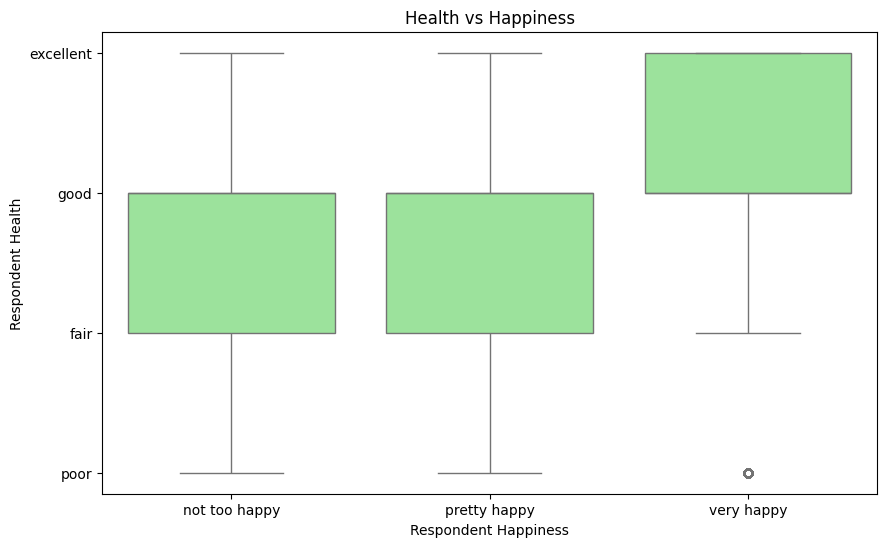

In [13]:
#  Graph of health v happiness
health_order = ['excellent', 'good', 'fair', 'poor']
df['health'] = pd.Categorical(df['health'], categories=health_order,
                              ordered=True)
plt.figure(figsize=(10, 6))
sns.boxplot(x='happy', y='health', data=df, order=happiness_order,
            hue_order=health_order, color="lightgreen")
plt.xlabel('Respondent Happiness')
plt.ylabel('Respondent Health')
plt.title('Health vs Happiness')
plt.show()

Excellent health tends to coincide with highest happiness level.

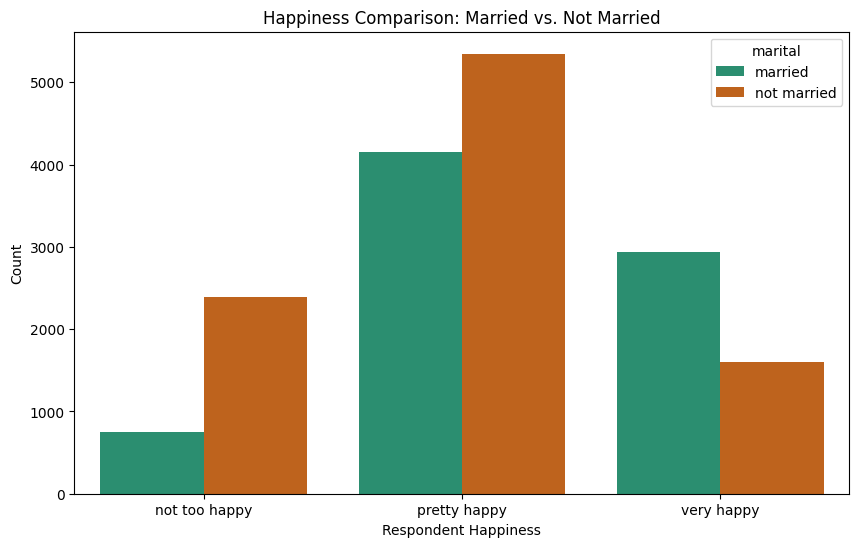

In [58]:
# Graph of marriage v happiness
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x='happy', hue='marital', data=df, order=happiness_order,
              palette="Dark2")
plt.xlabel('Respondent Happiness')
plt.ylabel('Count')
plt.title('Happiness Comparison: Married vs. Not Married')
plt.show()

In [54]:
df.loc[:,['happy','marital']].groupby('happy').describe()
# More pretty and very happy people are married

marital                          
                count unique          top  freq
happy                                          
not too happy    3147      2  not married  2393
pretty happy     9502      2  not married  5347
very happy       4539      2      married  2938

Very happy people are mostly married, whereas those who are not too happy or pretty happy are mostly not married.

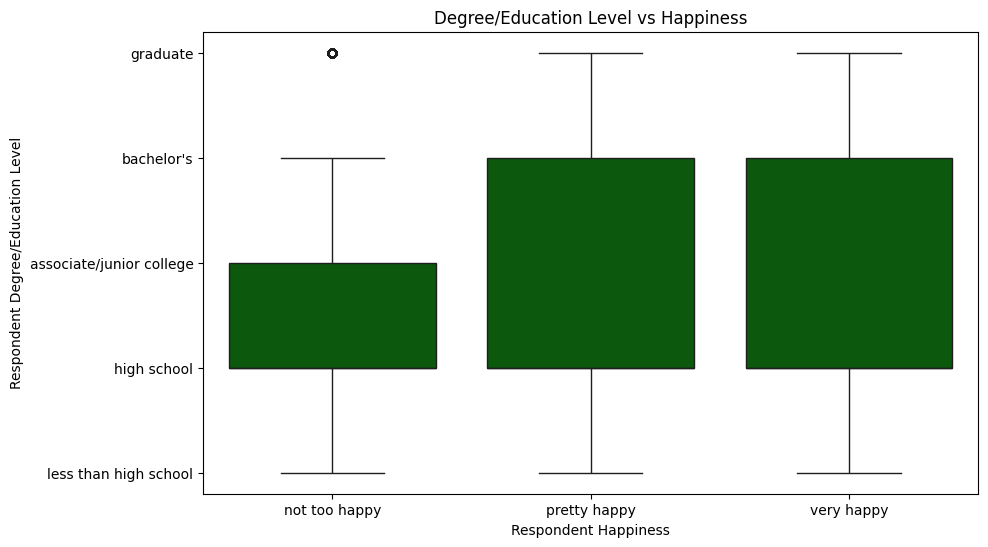

In [61]:
# Graph of education v happiness
educ_order = ['graduate',  "bachelor's",  'associate/junior college',
              'high school', 'less than high school']
df['degree'] = pd.Categorical(df['degree'], categories=educ_order,
                              ordered=True)
plt.figure(figsize=(10, 6))
sns.boxplot(x='happy', y='degree', data=df, order=happiness_order,
            hue_order=educ_order, color="darkgreen")
plt.xlabel('Respondent Happiness')
plt.ylabel('Respondent Degree/Education Level')
plt.title('Degree/Education Level vs Happiness')
plt.show()

Graph only shows slight correlation with not too happy people having lower education levels (y-axis increases in education level), see outlier with graduate degree.

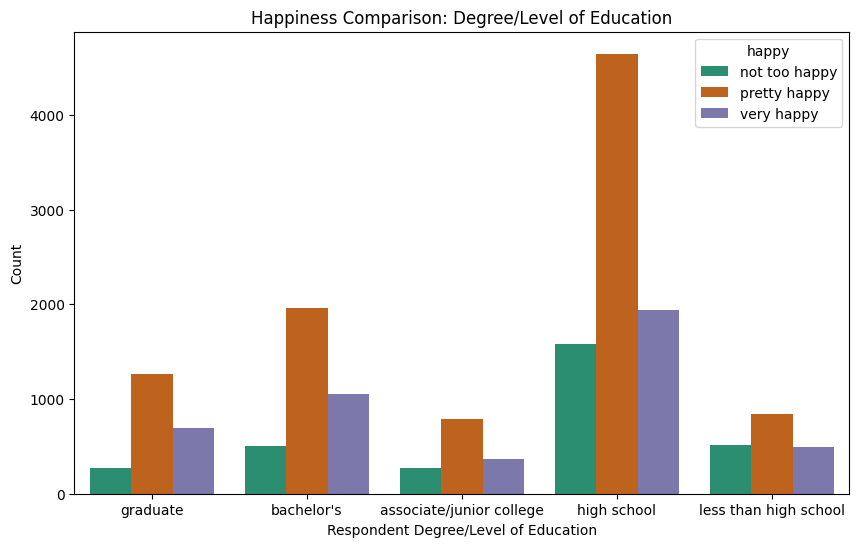

In [59]:
# 2nd Graph of education v happiness
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x='degree', hue='happy', data=df, order=educ_order,
              hue_order=happiness_order,  palette="Dark2")
plt.xlabel('Respondent Degree/Level of Education')
plt.ylabel('Count')
plt.title('Happiness Comparison: Degree/Level of Education')
plt.show()

Trend isn't really seen by degree, most poeple with each degree level show same happiness level.

In [56]:
df.loc[:,['happy','degree']].groupby('happy').describe()
# Doesn't really give us anything

degree                          
               count unique          top  freq
happy                                         
not too happy   3147      5  high school  1582
pretty happy    9502      5  high school  4645
very happy      4539      5  high school  1936

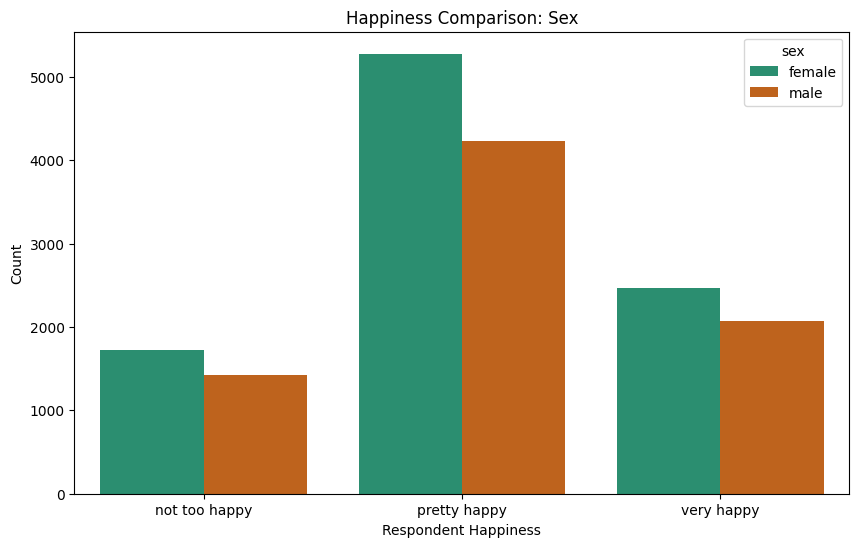

In [60]:
# Graph of happiness v sex
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x='happy', hue='sex', data=df, order=happiness_order,
              palette="Dark2")
plt.xlabel('Respondent Happiness')
plt.ylabel('Count')
plt.title('Happiness Comparison: Sex')
plt.show()

Females make up the greatest percent in each happpiness level (perhaps this is due to more women completing the survey than men). Women are more unhappy but also more VERY happy.

In [57]:
df.loc[:,['happy','sex']].groupby('happy').describe()
# Females dominate all categories of happiness

sex                     
              count unique     top  freq
happy                                   
not too happy  3147      2  female  1722
pretty happy   9502      2  female  5276
very happy     4539      2  female  2471